In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [3]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [4]:
#data.info()

In [5]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [8]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [9]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [10]:
data = pd.read_csv('./data/df_2016_formatted_with_zip.csv')

In [11]:
data.shape

(1127959, 24)

In [12]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
0,0.0,37115.0,PD201600091501,2016-01-26 07:31:00,20160082555,A,43,Want Officer for Investigation / Assistance,RT,REPORT FOR TELESERVE,1,M.P.D. REPORT COMPLED,100.0,MENEES LN,TE03,M,13.0,1621.0,36.214,-86.647,"(36.214, -86.647)",1,26,POINT (-86.64700000000001 36.214)
1,0.0,37115.0,PD201600414482,2016-04-22 03:24:00,20160367895,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,200.0,MENEES LN,711C,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",4,22,POINT (-86.64700000000001 36.217)
2,0.0,37115.0,PD201600246140,2016-03-07 15:41:00,20160220182,B,57,Fight / Assault,P,PROGRESS,11,DISREGARD / SIGNAL 9,200.0,MENEES LN,NaN,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",3,7,POINT (-86.64700000000001 36.217)
3,0.0,37115.0,PD201600017629,2016-01-06 04:35:00,20160015959,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,200.0,MENEES LN,712C,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",1,6,POINT (-86.64700000000001 36.217)
4,0.0,37115.0,PD201600267918,2016-03-13 10:57:00,20160239421,A,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,11,DISREGARD / SIGNAL 9,0.0,HUDSON RD & PINEYWOOD ACRES DR,713A,M,13.0,1637.0,36.226,-86.657,"(36.226, -86.657)",3,13,POINT (-86.65700000000002 36.226)


In [13]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
1127954,NaN,NaN,PD201601315790,2016-12-31 21:59:00,20161153339,B,50,Theft,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,11,DISREGARD / SIGNAL 9,NaN,CHEYENNE BLVD,712B,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1127955,NaN,NaN,PD201601315831,2016-12-31 22:17:00,20161153374,B,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,NaN,NOLENSVILLE PKE,324B,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1127956,NaN,NaN,PD201601315987,2016-12-31 23:31:00,20161153509,NaN,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,14TH AV N,623C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1127957,NaN,NaN,PD201601316028,2016-12-31 23:47:00,20161153519,NaN,57,Fight / Assault,P,PROGRESS,6,ASSISTED OTHER UNIT,0.0,5TH AV S,5D57,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1127958,NaN,NaN,PD201601316044,2016-12-31 23:53:00,20161153528,NaN,54,Person with Weapon,P,PROGRESS,6,ASSISTED OTHER UNIT,NaN,9TH AV S,215C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)


In [14]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [15]:
#data['tc_desc'].value_counts()

In [16]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

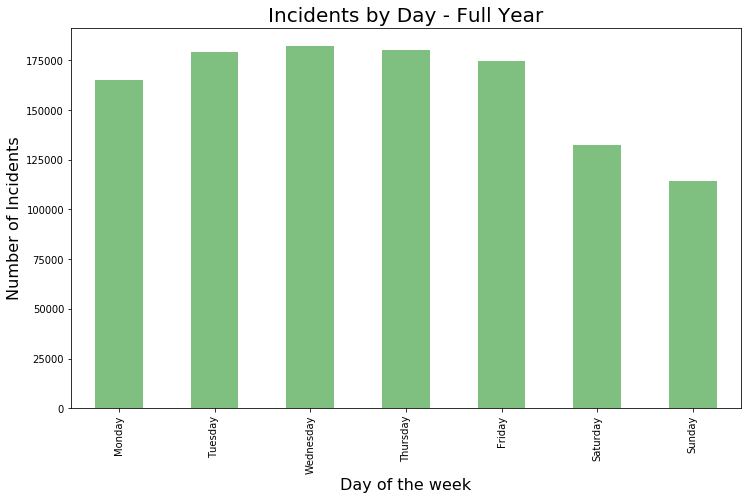

In [17]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

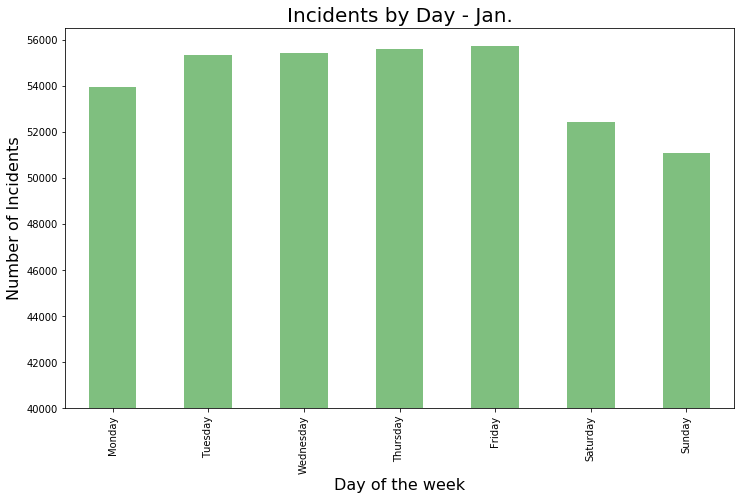

In [18]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

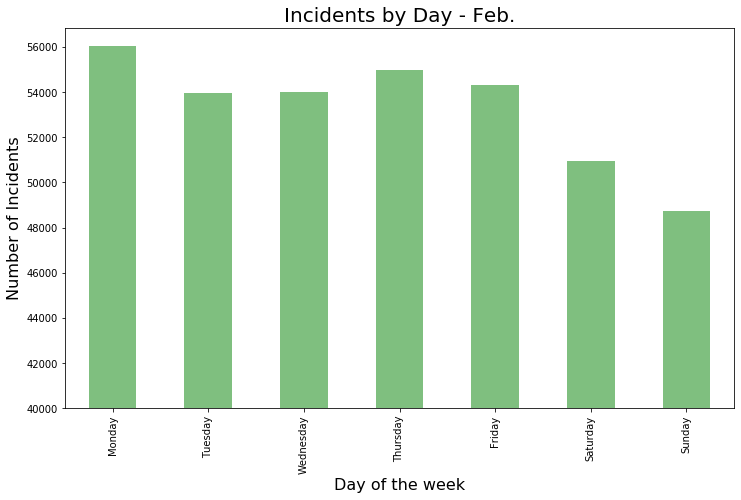

In [19]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

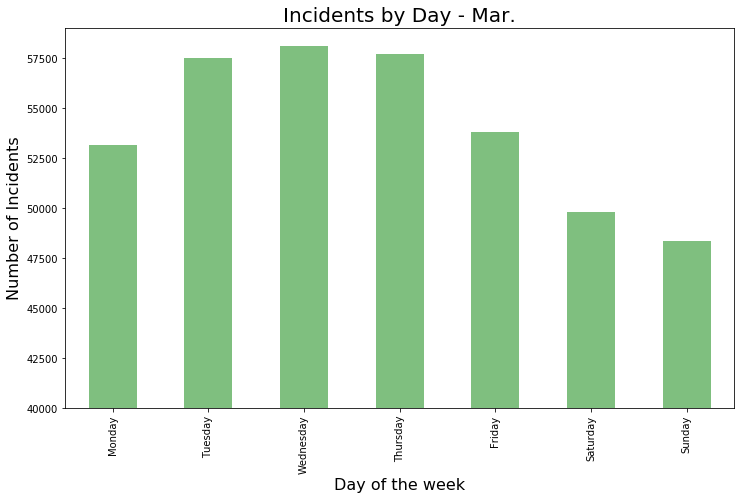

In [20]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

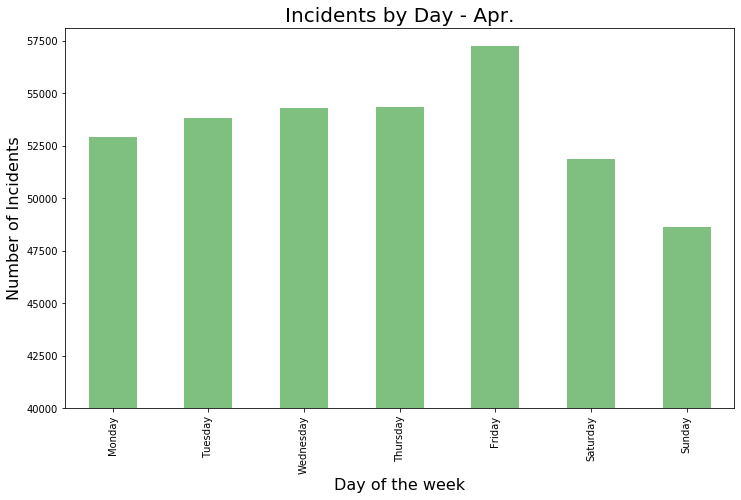

In [21]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

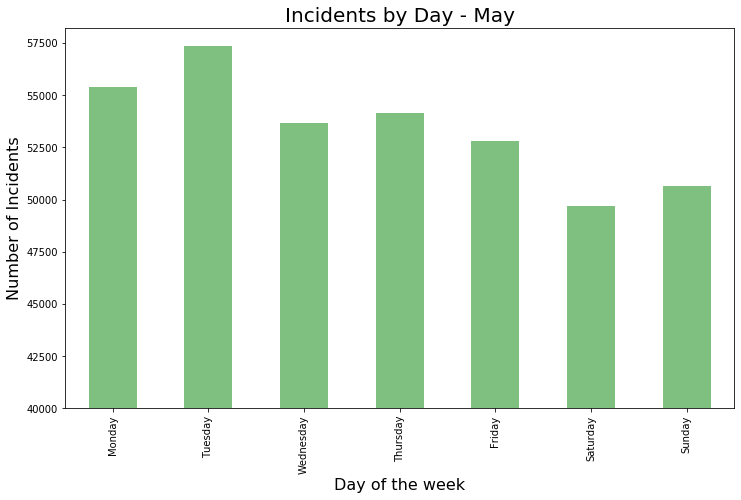

In [22]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

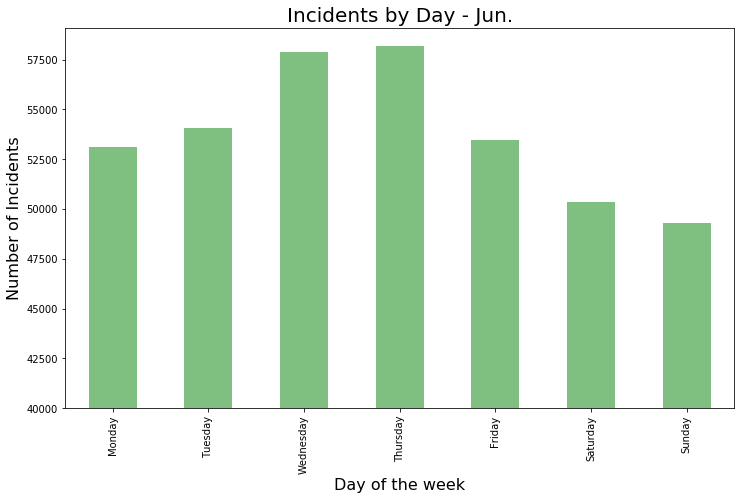

In [23]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

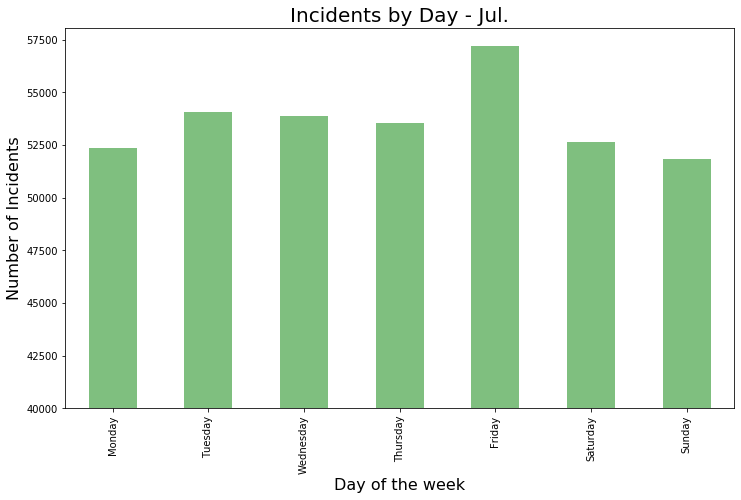

In [24]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

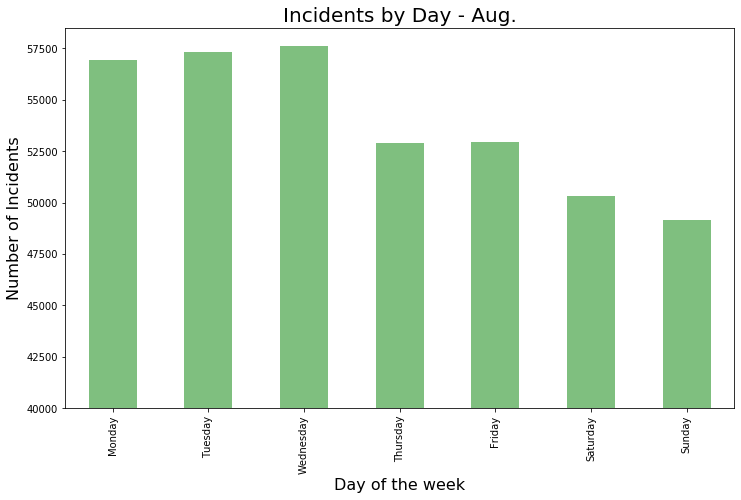

In [25]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

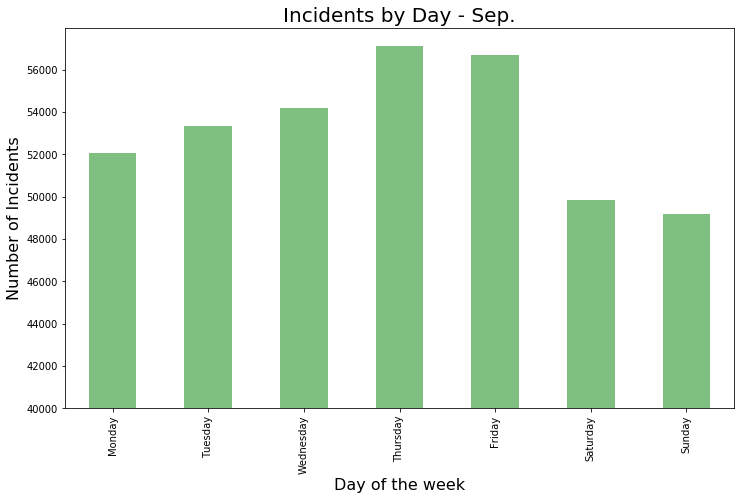

In [26]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

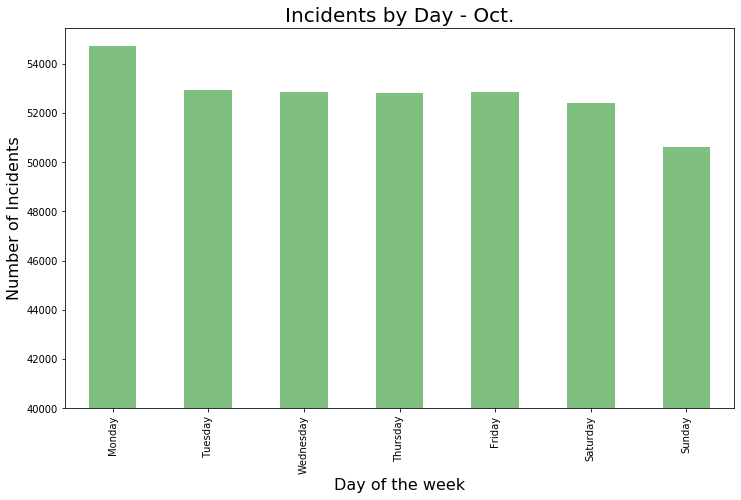

In [27]:
octo = data[data.month == 10]

# Number of incidents per day of the week
day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Oct.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

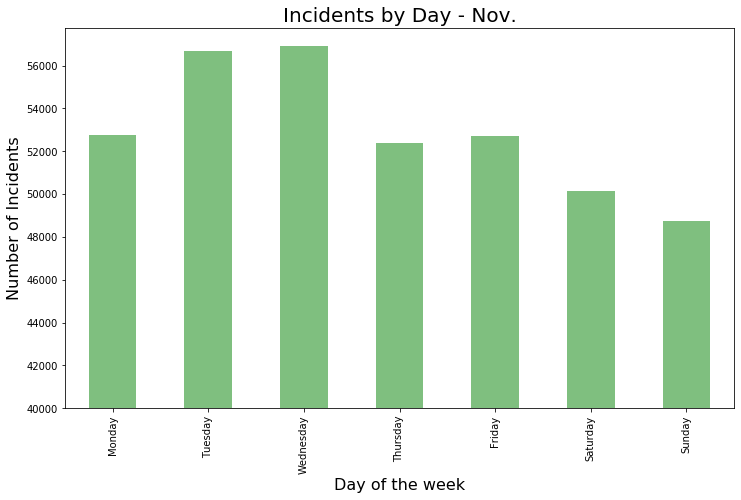

In [28]:
nov = data[data.month == 11]

# Number of incidents per day of the week
day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Nov.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

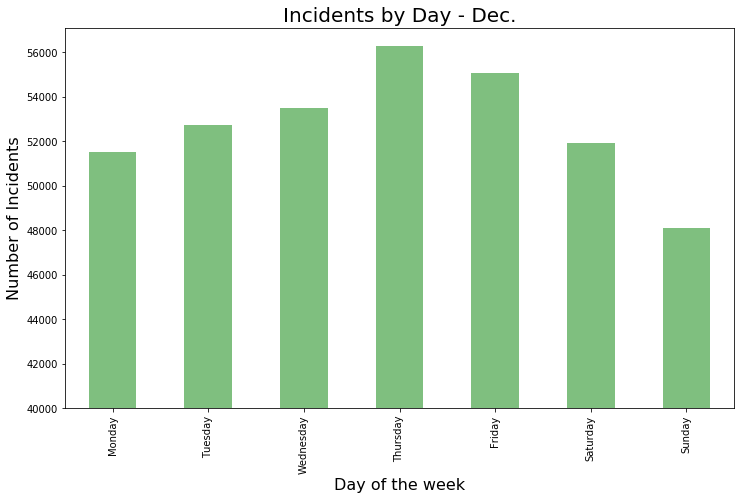

In [29]:
dec = data[data.month == 12]

# Number of incidents per day of the week
day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Dec.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [30]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
qt4 = pd.concat(q4)

In [31]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct, q4ct]

qtr = ['Q1','Q2','Q3','Q4']

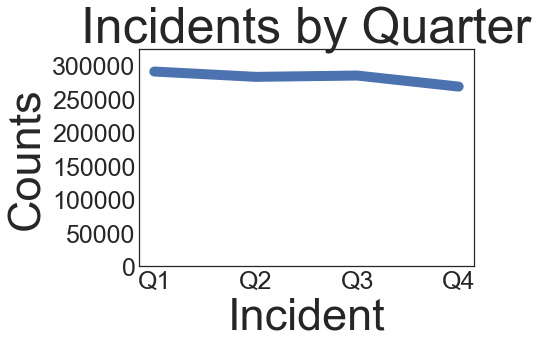

In [32]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [33]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     23808
2     23964
3     21481
4     23138
5     23474
6     22305
7     21619
8     22377
9     22561
10    22068
11    21483
12    22100
13    21835
14    21712
15    22542
16    21660
17    21071
18    21822
19    21926
20    21445
21    20288
22    21352
23    21948
24    21062
25    23481
26    23741
27    22094
28    21465
29    21542
30    21384
31    21082
32    22791
33    21236
34    21728
35    21806
36    21534
37    21235
38    21225
39    21549
40    19625
41    20102
42    21071
43    20624
44    20868
45    21282
46    21656
47    19637
48    21183
49    21752
50    21218
51    18398
52    16483
53     7126
Name: call_re, dtype: int64


In [34]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [35]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,23808
2,2,23964
3,3,21481
4,4,23138
5,5,23474
6,6,22305
7,7,21619
8,8,22377
9,9,22561
10,10,22068


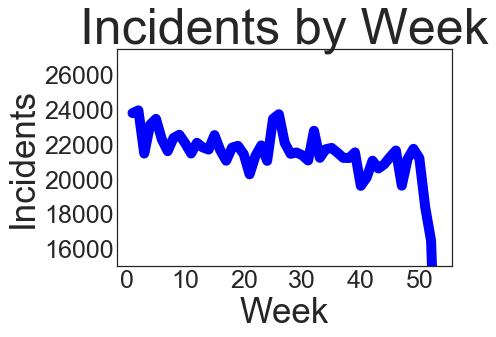

In [36]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

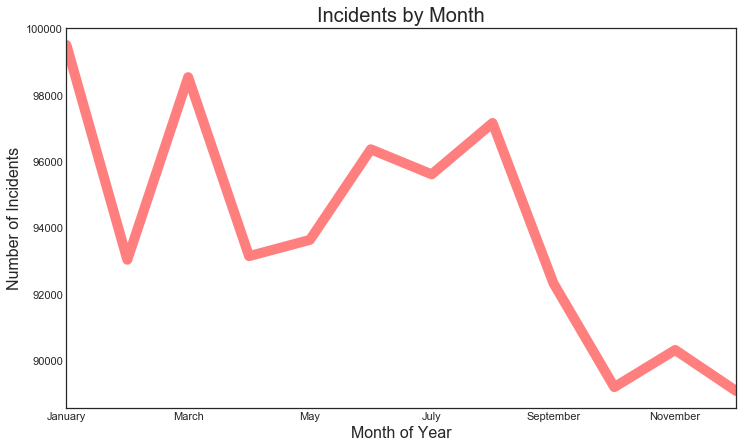

In [37]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [38]:
inc_ct = data.tc_desc.value_counts()

In [39]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [40]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

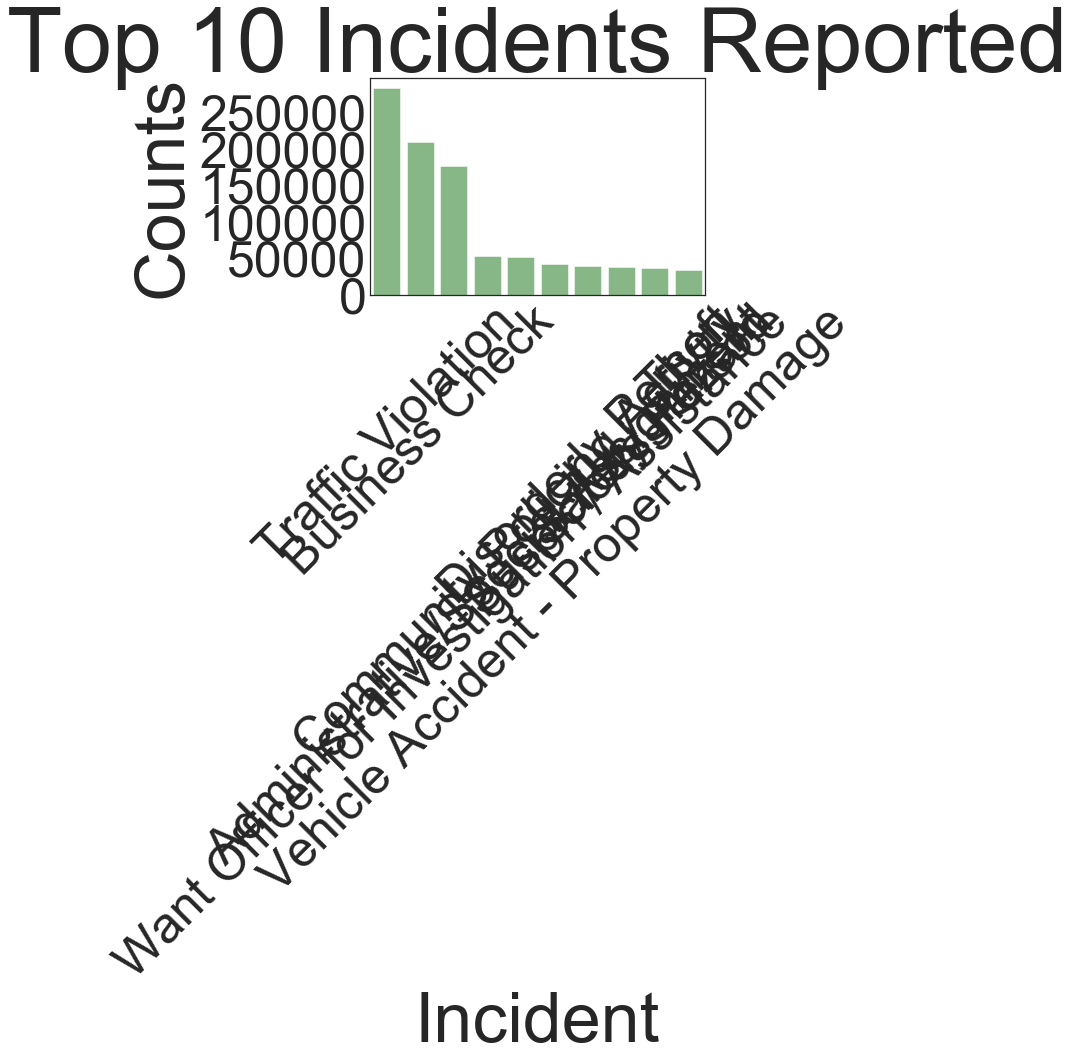

In [41]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [42]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

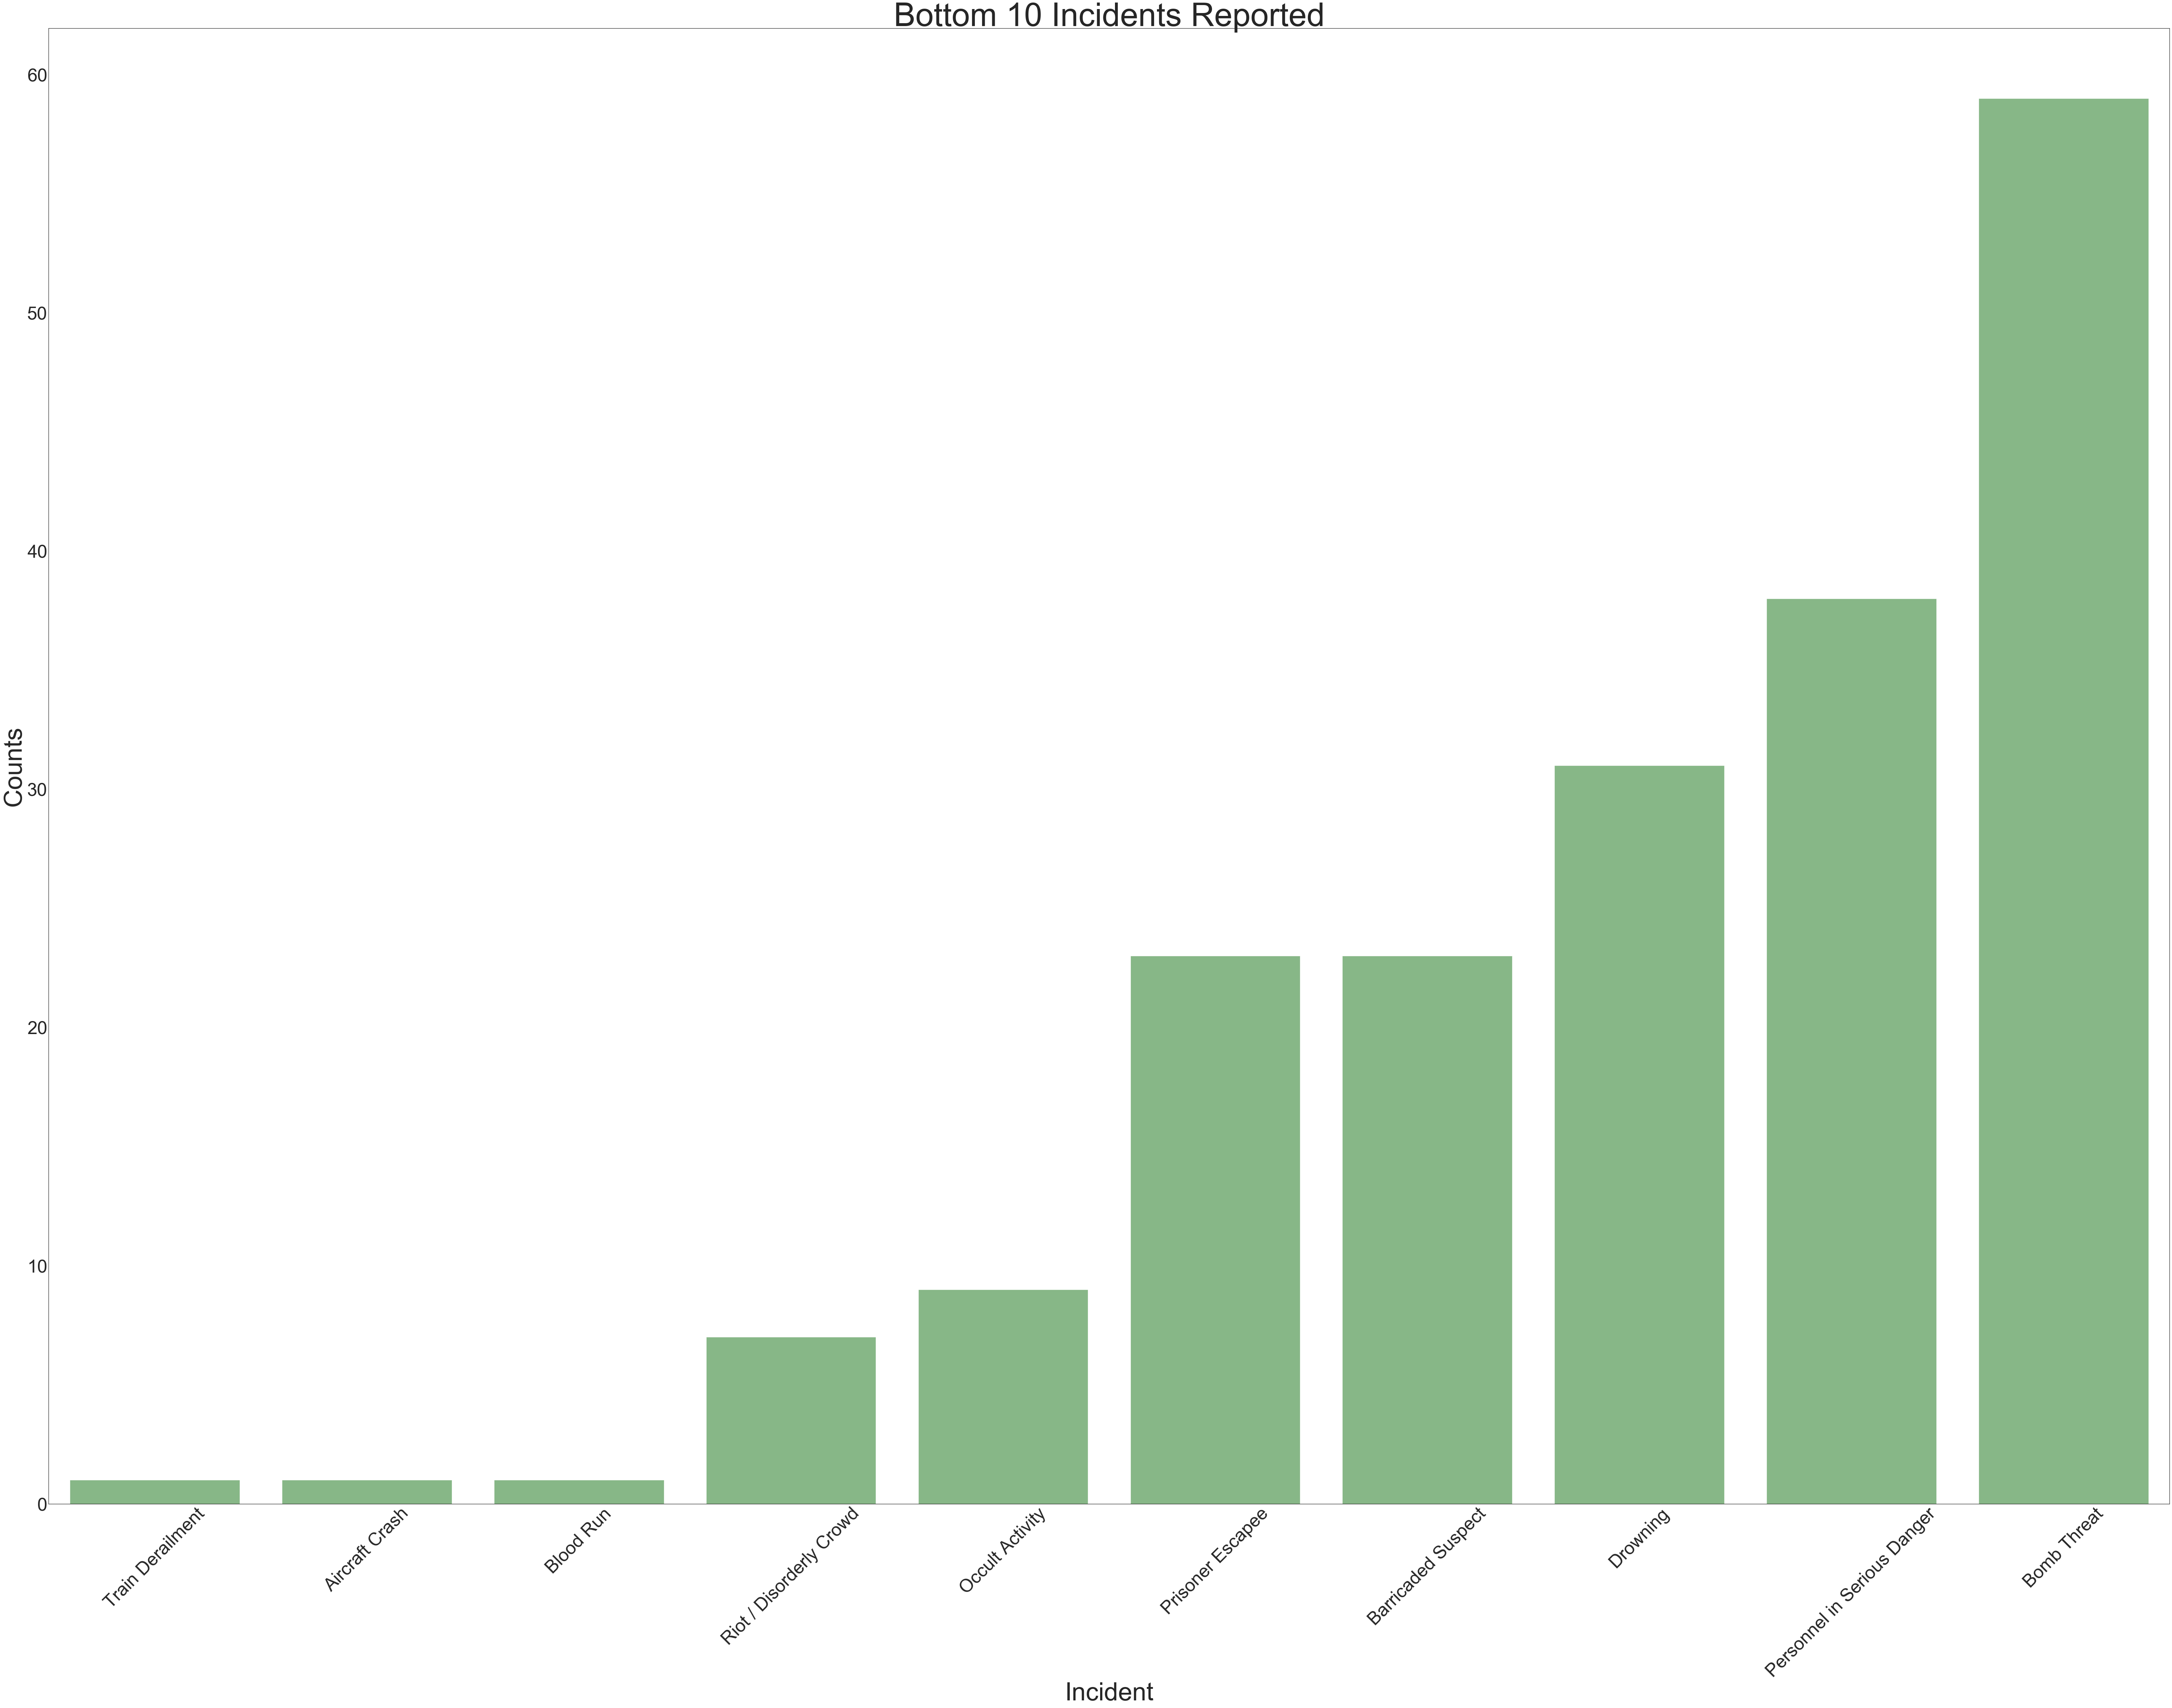

In [43]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [44]:
zip_ct = data.zip.value_counts()

In [45]:
zip_ct.shape

(38,)

In [46]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [47]:
zip_cts.head()

,zip,count
0,37203.0,97328
1,37211.0,92453
2,37207.0,87514
3,37209.0,81526
4,37115.0,71808


In [48]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

28366.947368421053


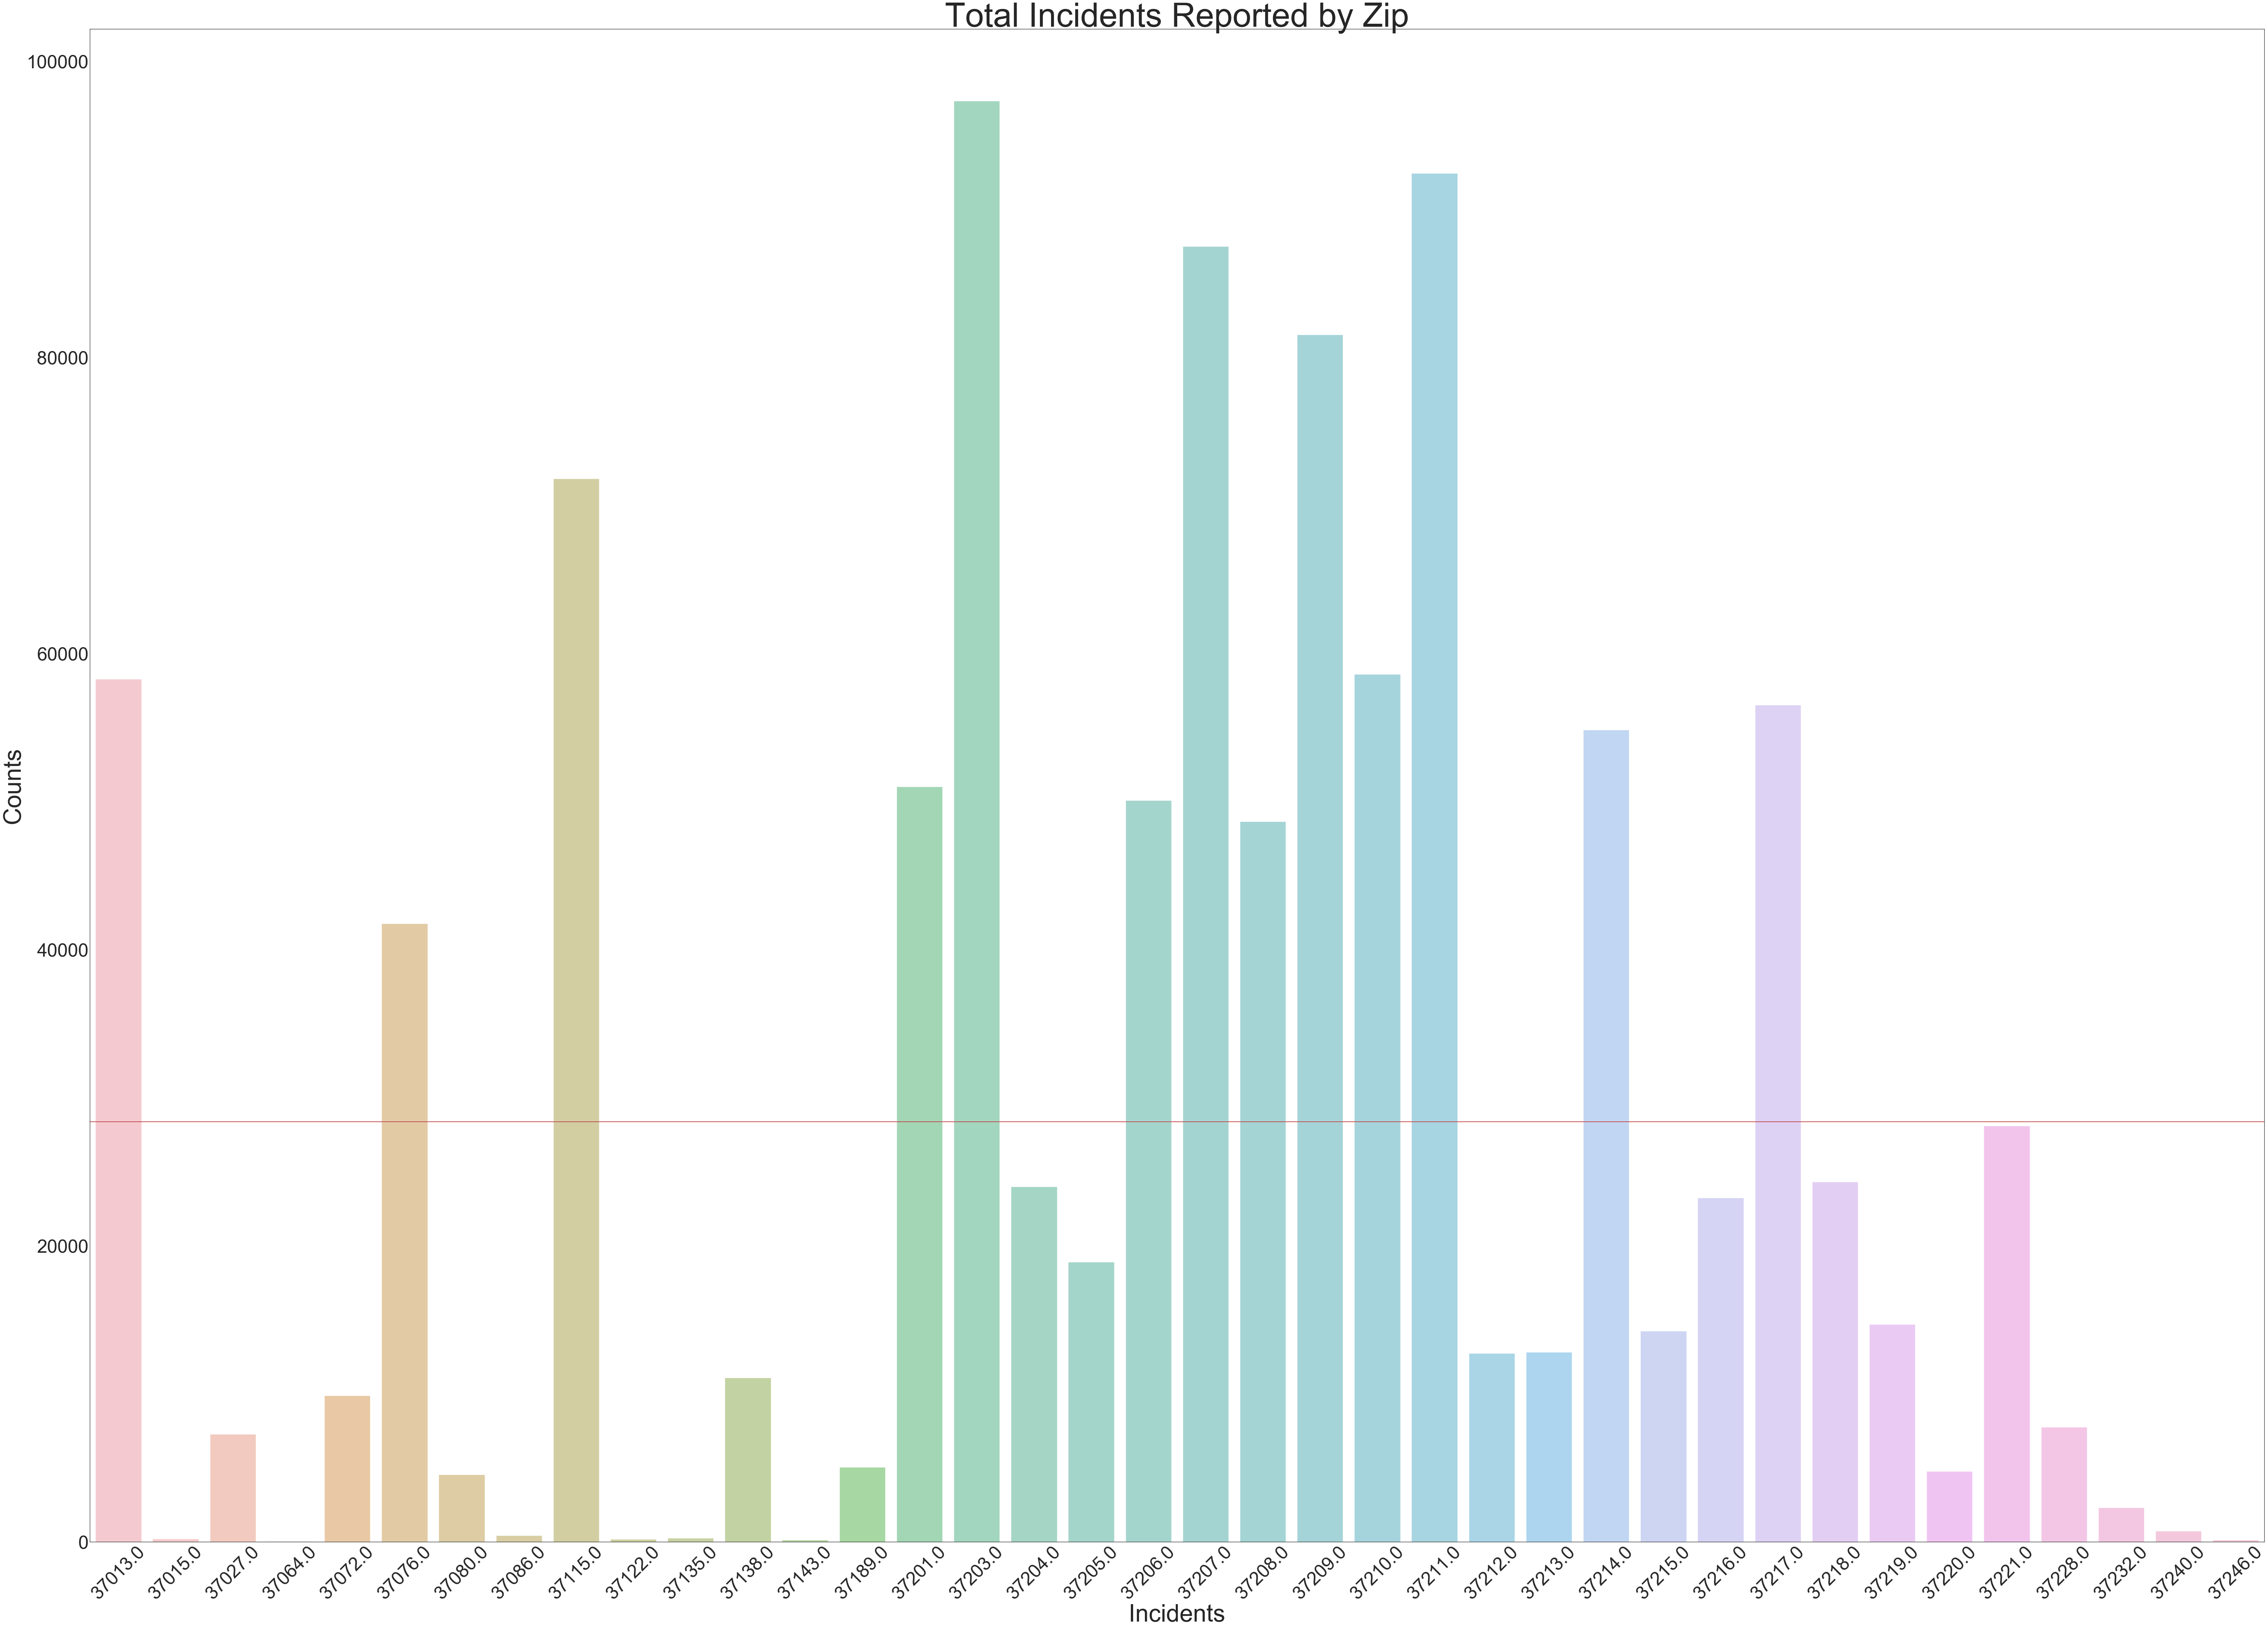

In [49]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [50]:
pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [51]:
pop_zips.head()

,Unnamed: 0,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
0,11901,37010,5198,5648,5568,5633,5751,5035,4679,37512
1,11902,37012,2424,2637,2766,2477,2436,2355,2292,17387
2,11903,37013,93372,90073,86261,81944,79903,76983,78406,586942
3,11904,37014,2663,2500,2410,2130,1746,1812,1855,15116
4,11905,37015,17996,18361,17846,17400,16985,16976,17184,122748


#### Merge zip_cts to pop_zips

In [52]:
zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [53]:
# only focus on this year's info

zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2015','y-2014','y-2013','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [54]:
zips_all.head()

,zip,count,y-2016
0,37203.0,97328,12726.0
1,37211.0,92453,77771.0
2,37207.0,87514,36977.0
3,37209.0,81526,38001.0
4,37115.0,71808,40146.0


#### Calculate crime rate by zipcode

In [55]:
zips_all['incident_rate'] = ((zips_all['count']/zips_all['y-2016'])*100000)

In [56]:
zips_all.head()

,zip,count,y-2016,incident_rate
0,37203.0,97328,12726.0,764796.479648
1,37211.0,92453,77771.0,118878.502269
2,37207.0,87514,36977.0,236671.444411
3,37209.0,81526,38001.0,214536.459567
4,37115.0,71808,40146.0,178867.134957


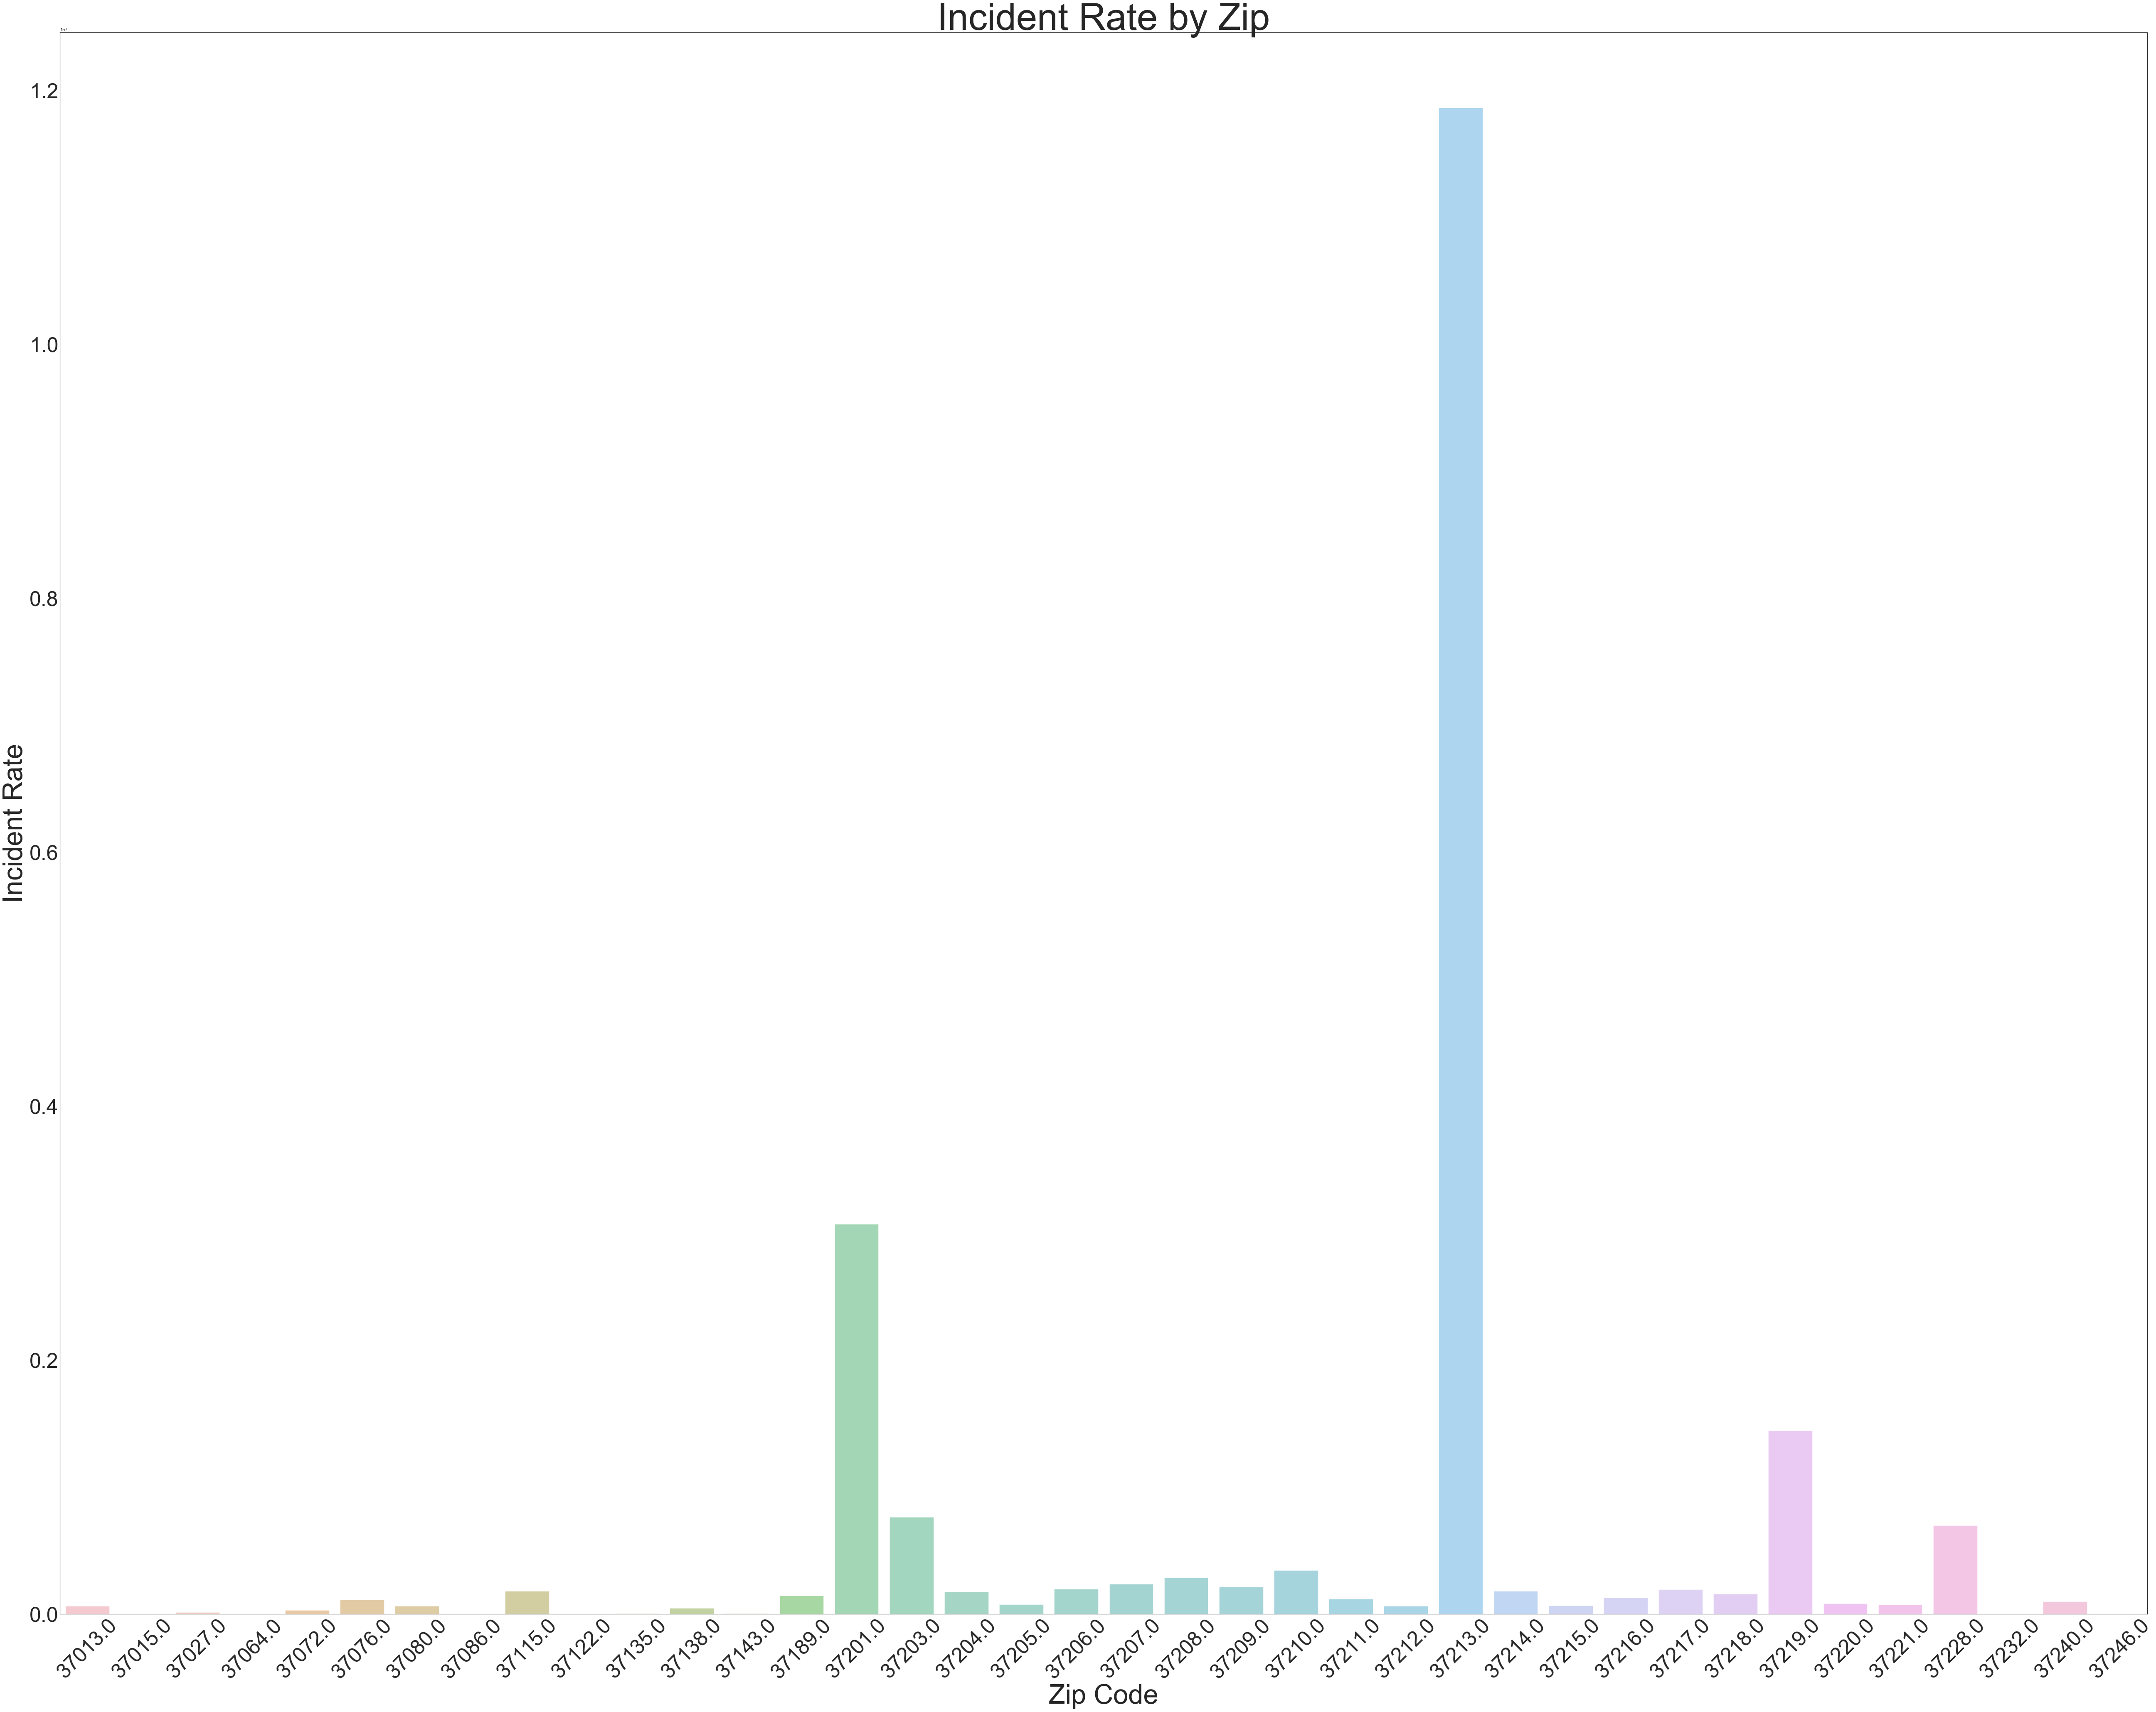

In [57]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "incident_rate", data = zips_all, ci = None, alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Incident Rate by Zip", fontsize = 90)
plt.xlabel("Zip Code", fontsize = 65)
plt.ylabel("Incident Rate", fontsize = 65)
plt.show()